In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


train_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/train_df.csv")
validation_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/validation_df.csv")

training_features = train_df.drop(columns=['Datum', "Umsatz"])
training_labels = train_df["Umsatz"]
validation_features = validation_df.drop(columns=['Datum', "Umsatz"])
validation_labels = validation_df["Umsatz"]

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(100, activation='relu'),
  Dense(40, activation='relu'),
  Dense(10, activation='relu'),
  Dense(1)
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 28)             │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │         2,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 40)             │         4,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,473 (29.19 KB)

 Trainable params: 7,417 (28.97 KB)

 Non-trainable params: 56 (224.00 B)

In [17]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 47741.9805 - val_loss: 5300.6040
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6923.9995 - val_loss: 4347.0864
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6598.6338 - val_loss: 4451.0693
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6404.9746 - val_loss: 4259.0796
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7906.4556 - val_loss: 4091.6309
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6265.5186 - val_loss: 4570.4453
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5852.0039 - val_loss: 3281.5850
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6137.4219 - val_loss: 3502.4778
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6969.2583 - val_loss: 4211.7314
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6251.3467 - val_loss: 4962.2114
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6955.8555 - val_loss: 4420.1

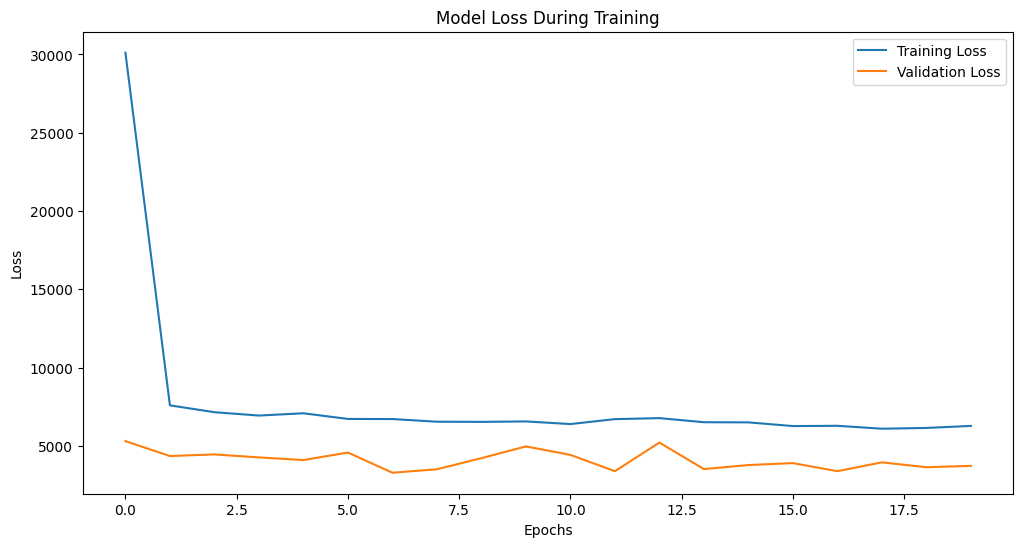

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

  1/235 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
MAPE on the Training Data: 102.39%
MAPE on the Validation Data: 106.04%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


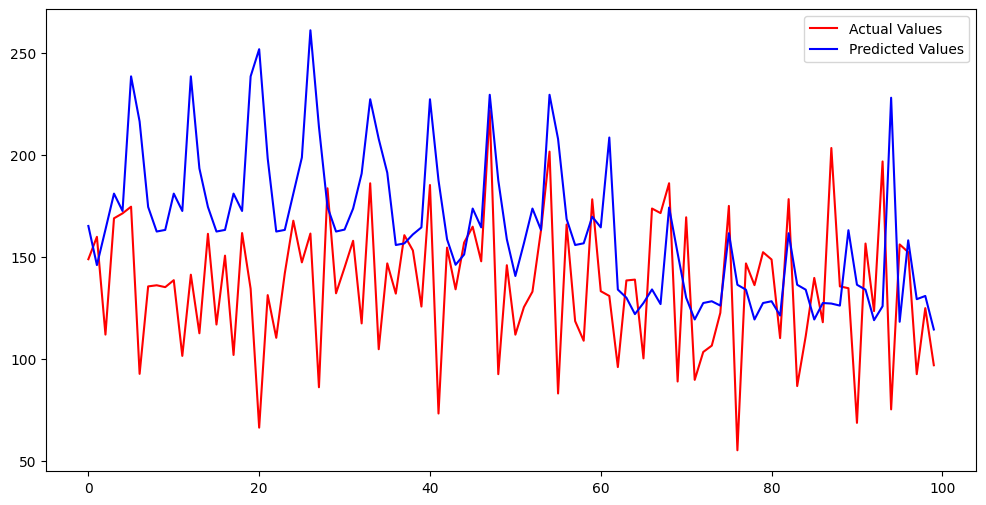

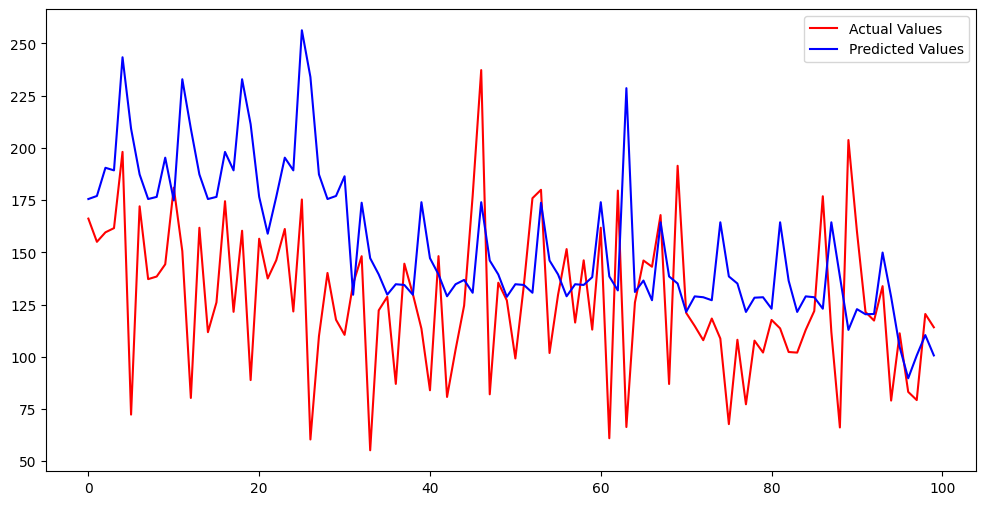

In [20]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [21]:
test_df = pd.read_csv("Daten_mit_Tourismuswerten_und_imputierten_Wetterdaten/test_df.csv")

test_features = test_df.drop(columns=['id', "Datum", "Umsatz"])

predictions = model.predict(test_features)

test_df['Umsatz'] = predictions

submission_df = test_df[['id', 'Umsatz']]

submission_df.to_csv("submission.csv", index=False)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step
